# RF, KNN, LGBM 최적 변수, 하이퍼파라미터 적용

In [2]:
import pandas as pd
import math
import numpy as np
from itertools import combinations

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')
df.describe()

,종가,WMA,MA5,PER,foreign_보유수량,RSI,MOM,MA20
count,1211.000000,1211.000000,1211.000000,1211.000000,1.211000e+03,1211.000000,1211.000000,1211.000000
mean,59555.119736,59526.044141,59535.083402,13.363014,3.240033e+09,50.403159,91.676301,59466.734930
std,13145.097859,13103.900910,13121.252909,6.275595,1.858532e+08,11.648865,2969.769407,13055.512086
min,37450.000000,38229.090910,38130.000000,6.240000,6.688376e+07,17.862466,-14850.000000,38905.000000
25%,47250.000000,47055.000000,47030.000000,7.730000,3.089509e+09,42.299292,-1700.000000,47193.750000
50%,58200.000000,58183.636360,58160.000000,10.470000,3.295815e+09,49.626786,-100.000000,58300.000000
75%,70200.000000,70360.909090,70340.000000,18.820000,3.380124e+09,58.426547,1800.000000,70477.500000
max,91000.000000,88329.090910,89960.000000,28.740000,3.462997e+09,84.499003,17100.000000,86710.000000


C:\Users\magne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\magne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\magne\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='MA20', ylabel='Density'>

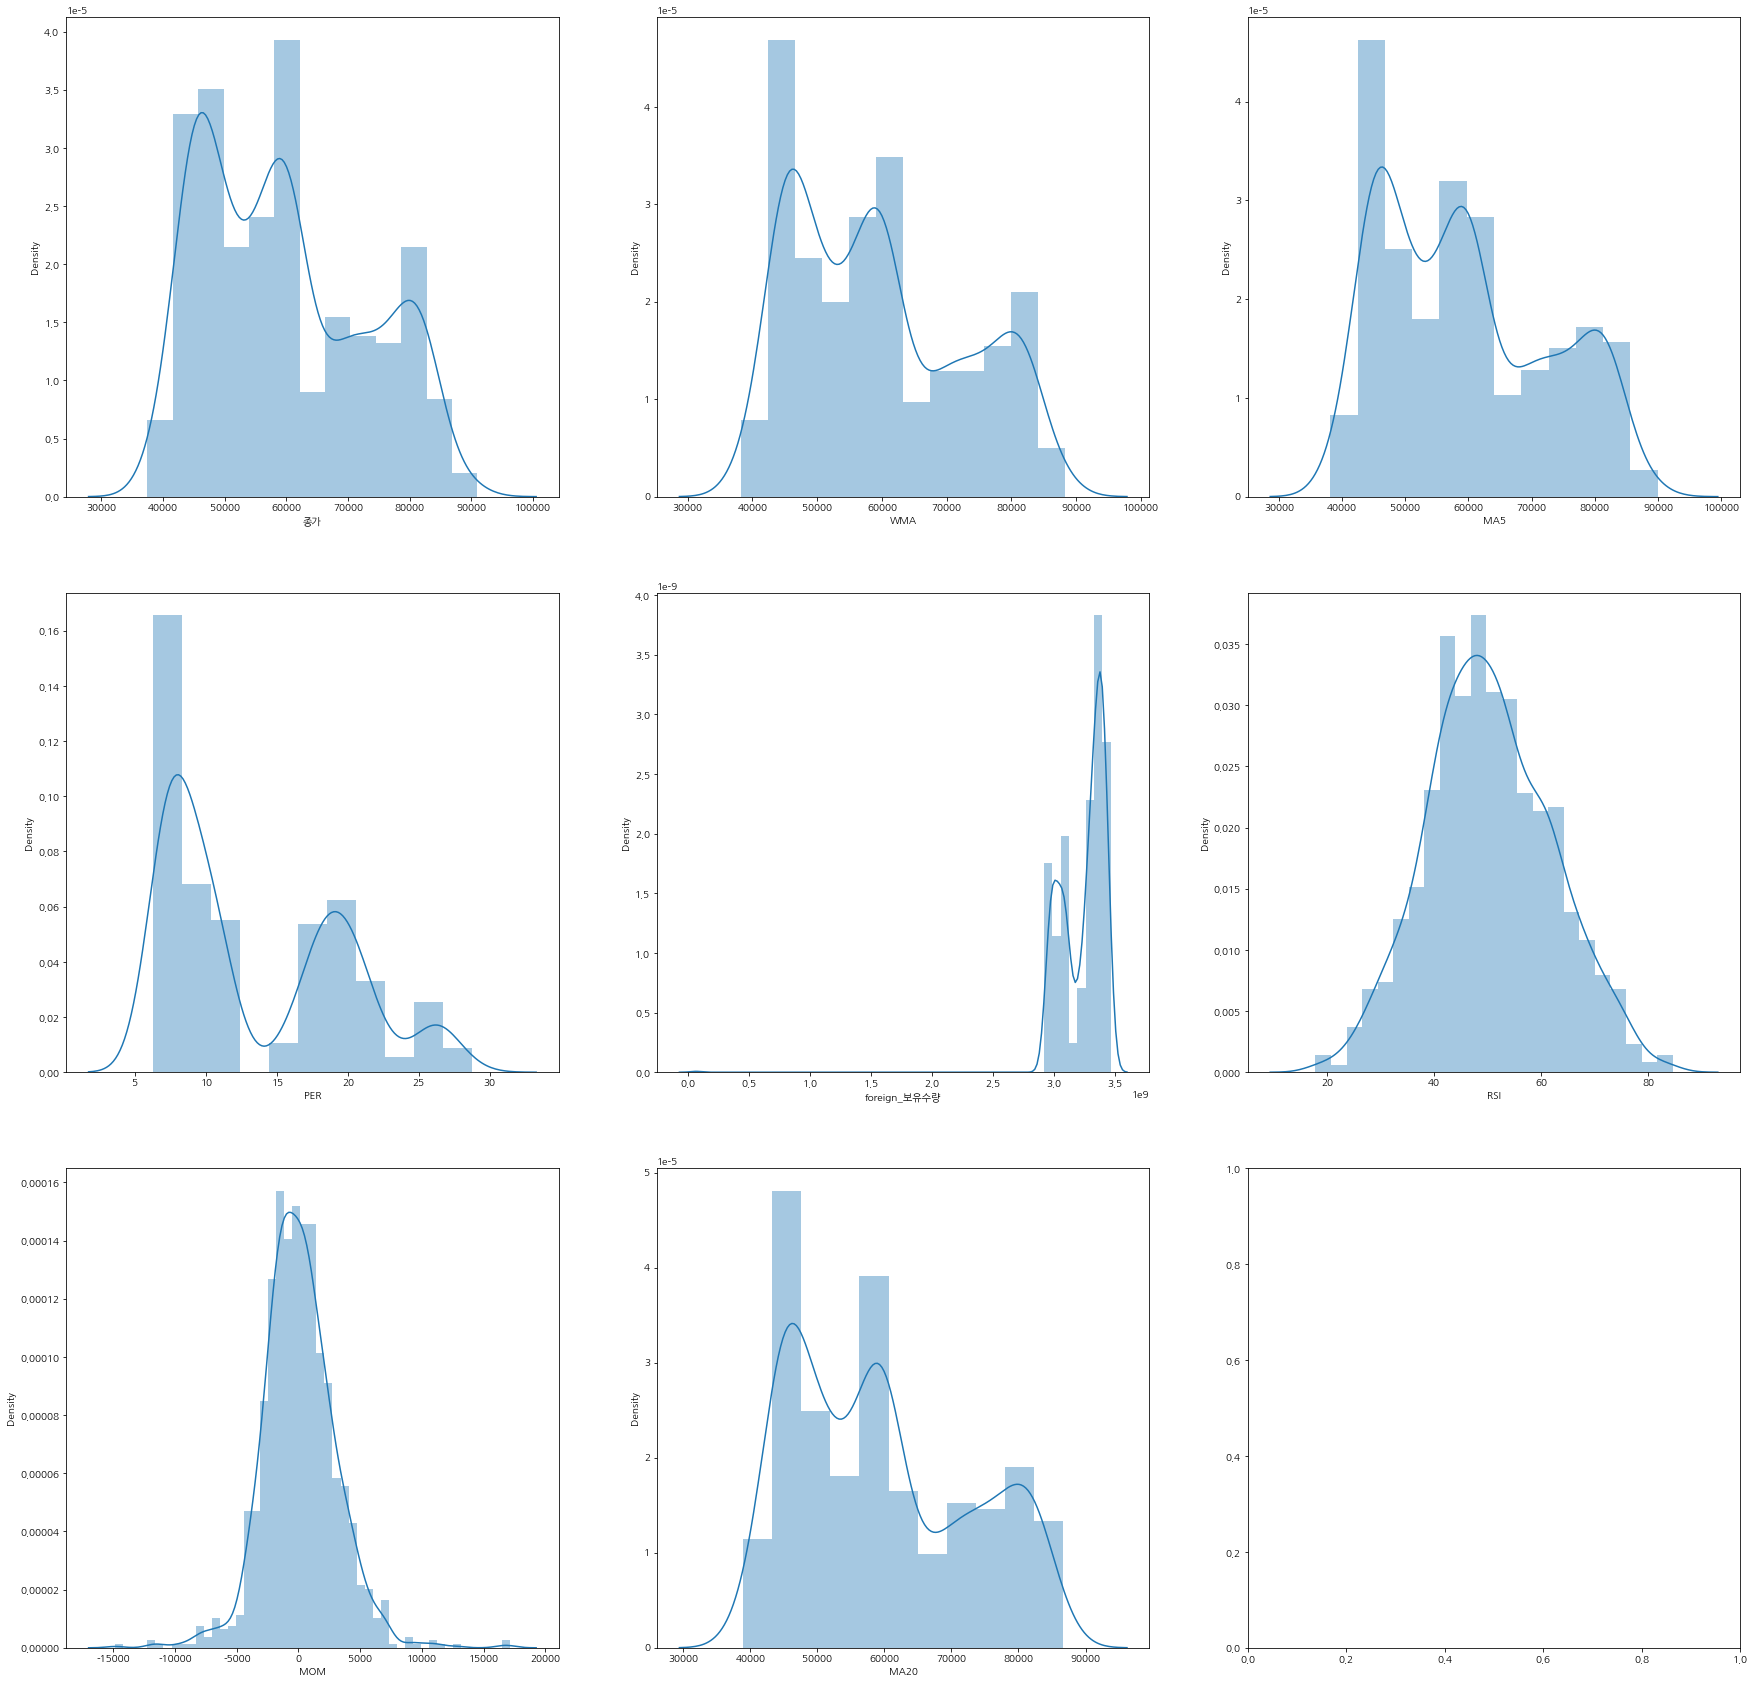

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(30,30))

sns.distplot(df['종가'], ax=ax[0,0])
sns.distplot(df['WMA'], ax=ax[0,1])
sns.distplot(df['MA5'], ax=ax[0,2])
sns.distplot(df['PER'], ax=ax[1,0])
sns.distplot(df['foreign_보유수량'], ax=ax[1,1])
sns.distplot(df['RSI'], ax=ax[1,2])
sns.distplot(df['MOM'], ax=ax[2,0])
sns.distplot(df['MA20'], ax=ax[2,1])

In [27]:
df

,종가,WMA,MA5,PER,foreign_보유수량,RSI,MOM,MA20
0,53000,51648.72727,51580,16.78,66883763,65.968830,3200,50022.0
1,51900,51740.00000,51580,8.65,3389738000,59.703911,1560,50190.0
2,52600,51930.18182,52008,8.77,3388514370,62.166241,2620,50414.0
3,50900,51763.63636,52108,8.49,3389966037,53.600113,-460,50613.0
4,51600,51732.72727,52000,8.60,3388367976,56.272030,-1180,50756.0
...,...,...,...,...,...,...,...,...
1206,62100,61461.81818,61760,10.75,3040249034,55.120378,2100,60675.0
1207,62900,61825.45455,62280,10.89,3040001094,58.623100,3900,60795.0
1208,62700,62081.81818,62600,10.85,3040243186,57.416624,2900,60900.0
1209,63200,62376.36364,62780,10.94,3036800280,59.652225,3300,61020.0


In [26]:
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor

li = []

for r in range(1, 8):
    # 1부터 7까지의 수 중에서 r개를 뽑는 조합 생성
    for combination in combinations(range(1, 9), r):
        a = list(combination)
        li.append(a)


combili = []
        
for kk in li :
    
    kk.append(0)
#     print(kk)
    df = pd.read_csv('./stock_v12.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 1
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)

    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)

    train_predict=rf.predict(X_train)
    test_predict=rf.predict(X_test)

    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val



    rf_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    rf_r2 = r2_score(y_test,test_predict)
    

    df = pd.read_csv('./stock_v12.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 1
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)


    
    neighbor = neighbors.KNeighborsRegressor(n_neighbors=15)
    neighbor.fit(X_train, y_train)

    train_predict=neighbor.predict(X_train)
    test_predict=neighbor.predict(X_test)

    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val


    knn_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    knn_r2 = r2_score(y_test,test_predict)

    df = pd.read_csv('./stock_v12.csv', encoding='cp949')

    scaler=MinMaxScaler(feature_range=(0,1))
    sdf=scaler.fit_transform(np.array(df))

    max_val = max(df['종가'])
    min_val = min(df['종가'])

    training_size=int(len(sdf)*0.70)
    test_size=len(sdf)-training_size
    train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

    def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            a = dataset[i:(i+time_step), kk]
            dataX.append(a)
            dataY.append(dataset[i + time_step, 0])

        return np.array(dataX), np.array(dataY)

    time_step = 1
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)
    X_train = X_train.reshape(X_train.shape[0],-1)
    X_test = X_test.reshape(X_test.shape[0],-1)


    params = {'n_estimators': 1000,
              'max_depth' : -1,
              'learning_rate': 0.1}

    lgbm = LGBMRegressor(**params).fit(X_train, y_train)

    train_predict=lgbm.predict(X_train)
    test_predict=lgbm.predict(X_test)


    train_predict = train_predict*(max_val-min_val) + min_val

    y_train = y_train.reshape(-1,1)
    y_train = y_train*(max_val-min_val) + min_val

    test_predict = test_predict*(max_val-min_val) + min_val

    y_test = y_test.reshape(-1,1)
    y_test = y_test*(max_val-min_val) + min_val



    lgbm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
    lgbm_r2 = r2_score(y_test,test_predict)
    algo_li = ['RF', 'KNN', 'LGBM']

    rmse_li = [rf_rmse, knn_rmse, lgbm_rmse]

    r2_li = [rf_r2, knn_r2, lgbm_r2]

    def listToString(str_list):
        result = ""
        for s in str_list:
            result += s + " "
        return result.strip()


    col_li = list(df.iloc[:,kk].columns)
    result = listToString(col_li)
    
    
    data = {'data' : result,
        'model':algo_li, 
            'rmse': rmse_li, 
            'r2': r2_li}

    comparison = pd.DataFrame(data)

    comparison = comparison.sort_values(['r2'], ascending=False)
    
    combili.append(comparison)
merged_df = pd.concat(combili, axis=0)
df = merged_df.sort_values(by='r2', ascending=False)
df.to_csv('./nt_fs1.csv',encoding='cp949',index=False)

In [28]:
merged_df = pd.concat(combili, axis=0)
df = merged_df.sort_values(by='r2', ascending=False)
df.to_csv('./gogo2.csv',encoding='cp949',index=False)

In [30]:
df

,data,model,rmse,r2
1,MA5 종가,KNN,1131.427495,0.972820
2,MA5 foreign_보유수량 RSI 종가,LGBM,1135.067390,0.972645
2,foreign_보유수량 RSI 종가,LGBM,1141.240769,0.972347
0,PER RSI 종가,RF,1148.792866,0.971980
2,foreign_보유수량 종가,LGBM,1167.888133,0.971040
...,...,...,...,...
1,PER foreign_보유수량 RSI MOM MA20 종가,KNN,3634.733126,0.719498
1,PER RSI 종가,KNN,3724.334520,0.705498
1,PER RSI MOM 종가,KNN,3761.175747,0.699643
1,PER foreign_보유수량 RSI 종가,KNN,3829.599679,0.688615


# 결론 : KNN, LGBM는 1일전 종가만 이용하는 경우가 가장 결과가 좋으며 RF는 1일전 PER, RSI, 종가를 이용할 때 가장 결과가 좋음

KNN : 1066.941422, 0.975688
LGBM : 1118.513145, 0.973281
RF : 1148.792866, 0.971980

# ------------------------------------------------------------------
RF <- 1일전 종가, PER, RSI

KNN <- 1일전 종가

LGBM <- 1일전 종가

하이퍼파라미터 최적화 실시

In [34]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,3,5]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

from sklearn.ensemble import RandomForestRegressor

params = [{ 
    'n_estimators': [10,50,100, 200, 500],
    'max_depth': [None,5,10,15,20,30],
    'min_samples_leaf' : [1,5,10,15,20,30],
    'min_samples_split' : [2,5,10,15,25,30]
    
}]

rf_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, cv= 4) 
rf_cv.fit(X_train, y_train)


train_predict=rf_cv.predict(X_train)
test_predict=rf_cv.predict(X_test)

train_predict = train_predict.reshape(-1,1)
train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict.reshape(-1,1)
test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val

rf_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
rf_r2 = r2_score(y_test,test_predict)
rf_cv.best_params_, rf_rmse, rf_r2


KeyboardInterrupt: 

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
1172.3347987874997
0.9708194256430778

In [11]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,3,5]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


train_predict=rf.predict(X_train)
test_predict=rf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict.reshape(-1,1)
test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val

rf_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
rf_r2 = r2_score(y_test,test_predict)
print(rf_rmse)
print(rf_r2)
print(rf.get_params)


1150.0303648471752
0.9719192218992786
<bound method BaseEstimator.get_params of RandomForestRegressor()>


In [23]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), [0,3,5]]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2)
rf.fit(X_train, y_train)


train_predict=rf.predict(X_train)
test_predict=rf.predict(X_test)

train_predict = train_predict.reshape(-1,1)
train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict.reshape(-1,1)
test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val

rf_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
rf_r2 = r2_score(y_test,test_predict)
print(rf_rmse)
print(rf_r2)
print(rf.get_params)


1148.9806710837354
0.9719704601383568
<bound method BaseEstimator.get_params of RandomForestRegressor()>


In [ ]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

params = [{'n_neighbors': [2, 5,10,15,20,25,30],
          'weights' : ['uniform','distance'],
           'metric' : ['minkowski','euclidean','manhattan'],
          'leaf_size' : [10,20,30,50]}]

knn_cv = GridSearchCV(estimator=neighbors.KNeighborsRegressor(), param_grid=params, cv= 5) 
knn_cv.fit(X_train, y_train)

train_predict=knn_cv.predict(X_train)
test_predict=knn_cv.predict(X_test)

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


knn_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
knn_r2 = r2_score(y_test,test_predict)
print(knn_cv.best_params_)
print(knn_rmse)
print(knn_r2)

교차 검증 시 성능이 더 낮아짐

In [ ]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

params = [{'n_neighbors': [2, 5,10,15,20,25,30],
          'weights' : ['uniform','distance'],
           'metric' : ['minkowski','euclidean','manhattan'],
          'leaf_size' : [10,20,30,50]}]

knn_cv = GridSearchCV(estimator=neighbors.KNeighborsRegressor(), param_grid=params, cv= 5) 
knn_cv.fit(X_train, y_train)

train_predict=knn_cv.predict(X_train)
test_predict=knn_cv.predict(X_test)

train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val


knn_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
knn_r2 = r2_score(y_test,test_predict)
print(knn_cv.best_params_)
print(knn_rmse)
print(knn_r2)

In [ ]:
df = pd.read_csv('./stock_v11.csv', encoding='cp949')

scaler=MinMaxScaler(feature_range=(0,1))
sdf=scaler.fit_transform(np.array(df))

max_val = max(df['종가'])
min_val = min(df['종가'])

training_size=int(len(sdf)*0.70)
test_size=len(sdf)-training_size
train_data,test_data=sdf[0:training_size,:],sdf[training_size:len(sdf),:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])

    return np.array(dataX), np.array(dataY)

time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

params = [{'n_estimators': [100, 200, 300, 500],
          'max_depth' : [-1,10,20],
           'num_leaves' : [5,10,20,31],
          'learning_rate': [0.01,0.03,0.05,0.1]
          }]

lgbm_cv = GridSearchCV(estimator=LGBMRegressor(), param_grid=params, cv= 5) 
lgbm_cv.fit(X_train, y_train)

train_predict=lgbm_cv.predict(X_train)
test_predict=lgbm_cv.predict(X_test)


train_predict = train_predict*(max_val-min_val) + min_val

y_train = y_train.reshape(-1,1)
y_train = y_train*(max_val-min_val) + min_val

test_predict = test_predict*(max_val-min_val) + min_val

y_test = y_test.reshape(-1,1)
y_test = y_test*(max_val-min_val) + min_val



lgbm_rmse = math.sqrt(mean_squared_error(y_test,test_predict))
lgbm_r2 = r2_score(y_test,test_predict)
print(lgbm_cv.best_params_)
print(lgbm_rmse)
print(lgbm_r2)

{'learning_rate': 0.03, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 31}
1053.8368543892668
0.9764203536175536